In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [67]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# e-t
# e-
# dnhhyperparameters
input_size = 4
num_classes = 3
num_epochs = 100000
learning_rate = 0.01


In [68]:
iris = load_iris()
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)


(150, 4)
(150,)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# データの標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(np.mean(X_train, axis=0))
print(np.std(X_train, axis=0))


(100, 4)
(50, 4)
(100,)
(50,)
[-2.47274423e-15  3.85247390e-16 -4.26603197e-16 -7.66053887e-17]
[1. 1. 1. 1.]


In [70]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.liner = nn.Linear(input_size, num_classes)

    def forward(self, x):
        out = self.liner(x)
        return out


In [71]:
model = LogisticRegression(input_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [72]:
def train(X_train, y_train):
    inputs = torch.from_numpy(X_train).float()
    targets = torch.from_numpy(y_train).long()

    optimizer.zero_grad()
    outputs = model(inputs)

    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    return loss.item()

def valid(X_test, y_test):
    inputs = torch.from_numpy(X_test).float()
    targets = torch.from_numpy(y_test).long()

    outputs = model(inputs)
    val_loss = criterion(outputs, targets)

    # 精度を求める
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == targets).sum().item()
    val_acc = float(correct) / targets.size(0)

    return val_loss.item(), val_acc

loss_list = []
val_loss_list = []
val_acc_list = []
for epoch in range(num_epochs):
    # エポックごとにデータをシャッフル
    perm = np.arange(X_train.shape[0])
    np.random.shuffle(perm)
    X_train = X_train[perm]
    y_train = y_train[perm]

    loss = train(X_train, y_train)
    val_loss, val_acc = valid(X_test, y_test)

    if epoch % 10000 == 0:
        print('epoch %d, loss: %.4f vall_loss: %.4f val_acc: %.4f' % (epoch, loss, val_loss, val_acc))

    # logging
    loss_list.append(loss)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)


epoch 0, loss: 1.0079 vall_loss: 0.9971 val_acc: 0.6400
epoch 10000, loss: 0.1160 vall_loss: 0.1456 val_acc: 0.9400
epoch 20000, loss: 0.0815 vall_loss: 0.1167 val_acc: 0.9400
epoch 30000, loss: 0.0677 vall_loss: 0.1058 val_acc: 0.9400
epoch 40000, loss: 0.0600 vall_loss: 0.1001 val_acc: 0.9400
epoch 50000, loss: 0.0550 vall_loss: 0.0967 val_acc: 0.9400
epoch 60000, loss: 0.0515 vall_loss: 0.0943 val_acc: 0.9400
epoch 70000, loss: 0.0489 vall_loss: 0.0927 val_acc: 0.9400
epoch 80000, loss: 0.0468 vall_loss: 0.0915 val_acc: 0.9400
epoch 90000, loss: 0.0452 vall_loss: 0.0905 val_acc: 0.9400


<function matplotlib.pyplot.legend(*args, **kwargs)>

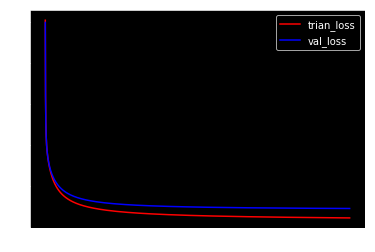

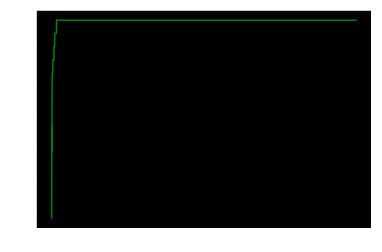

In [73]:
plt.figure()
plt.plot(range(num_epochs), loss_list, 'r-', label='trian_loss')
plt.plot(range(num_epochs), val_loss_list, 'b-', label='val_loss')
plt.legend()

plt.figure()
plt.plot(range(num_epochs), val_acc_list, 'g-', label='val_acc')
plt.legend



